# 3. Explore the Data

> "I don't know, what I don't know"

- Why do **visual exploration**?
- Understand Data Structure & Types
- Explore **single variable graphs** - (Quantitative, Categorical)
- Explore **dual variable graphs** - (Q & Q, Q & C, C & C)
- Explore **multi variable graphs**

In [75]:
# Load the libraries
import pandas as pd
import numpy as np

In [76]:
# Load the price data again and fill the missing values
df = pd.read_csv("data/Weed_Price.csv", parse_dates=[-1])
df.sort(columns=['State','date'], inplace=True)
df.fillna(method = "ffill", inplace=True)

In [77]:
# Load the demographic data
df_demo = pd.read_csv("data/Demographics_State.csv")

Lets load the libraries required for Visual Exploration

In [78]:
# Load the visualisation libraries
%matplotlib inline
import matplotlib.pyplot as plt

In [79]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

## 3.1 Single Variable - Quantiative

In [80]:
# Filter data for location California and calculate the Year
df['year'] = pd.DatetimeIndex(df['date']).year
df_cal = df[df["State"] == "California"]
df_cal.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,year
20098,California,248.77,12021,193.44,12724,193.88,770,2013-12-27,2013
20863,California,248.74,12025,193.44,12728,193.88,770,2013-12-28,2013
21577,California,248.76,12047,193.55,12760,193.60,772,2013-12-29,2013
22291,California,248.82,12065,193.54,12779,193.80,773,2013-12-30,2013
22801,California,248.76,12082,193.54,12792,193.80,773,2013-12-31,2013


In [81]:
# Set index as date
df_cal.index = df_cal.date
df_cal.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,year
date,,,,,,,,,
2013-12-27,California,248.77,12021,193.44,12724,193.88,770,2013-12-27,2013
2013-12-28,California,248.74,12025,193.44,12728,193.88,770,2013-12-28,2013
2013-12-29,California,248.76,12047,193.55,12760,193.60,772,2013-12-29,2013
2013-12-30,California,248.82,12065,193.54,12779,193.80,773,2013-12-30,2013
2013-12-31,California,248.76,12082,193.54,12792,193.80,773,2013-12-31,2013


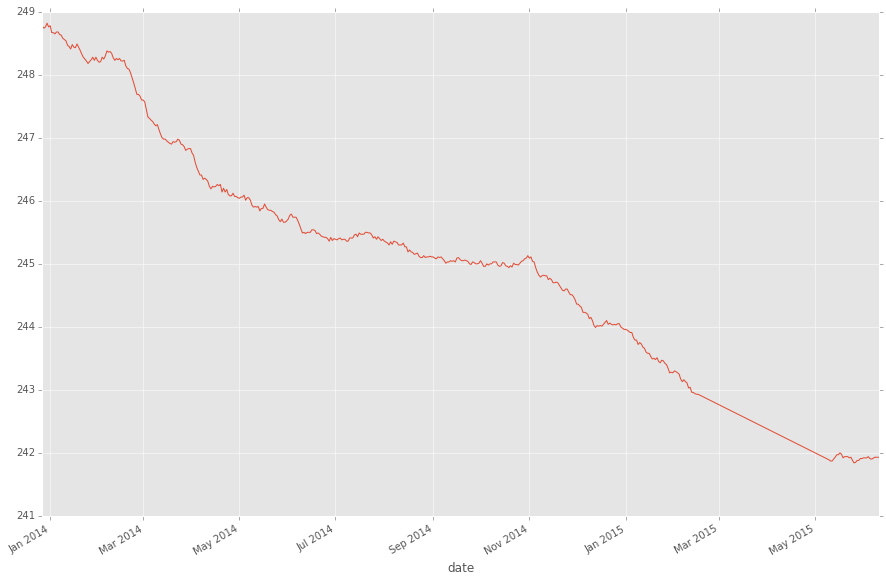

In [63]:
# Lets plot the HighQ prices
df_cal.HighQ.plot()

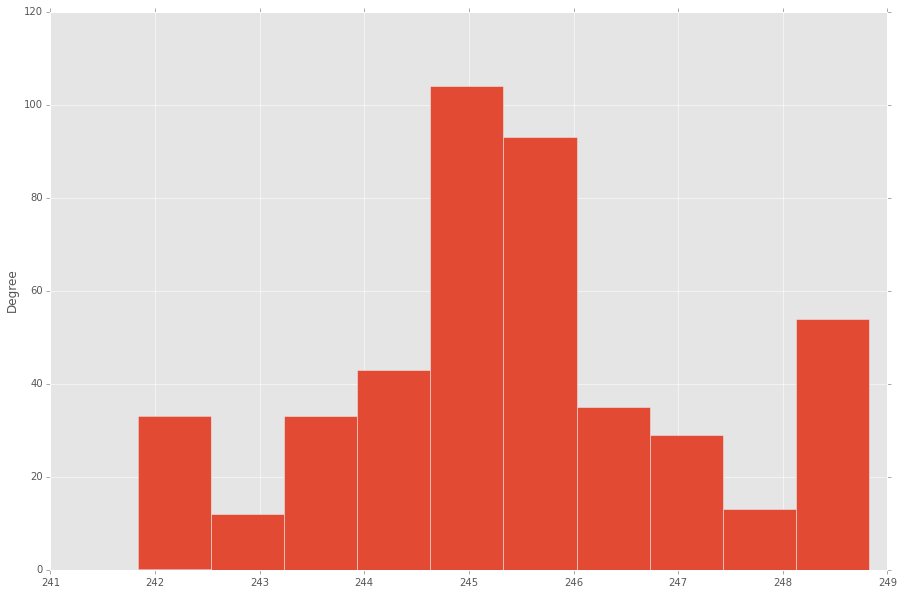

In [69]:
# Lets plot this HighQ as a histogram to see the most common price
df_cal.HighQ.plot(kind = "hist")

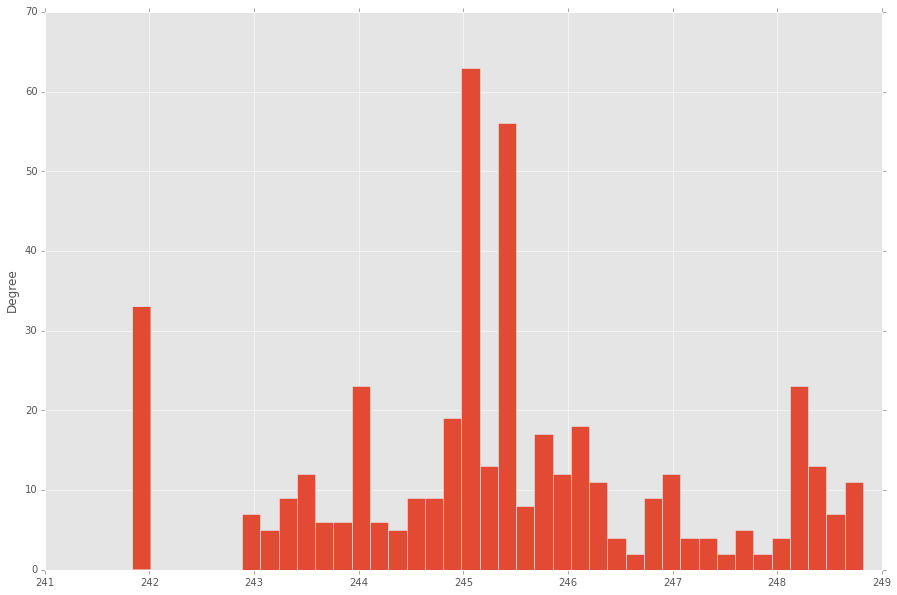

In [74]:
# Lets increase the bins to see some granularity
df_cal.HighQ.plot(kind = "hist", bins = 40)

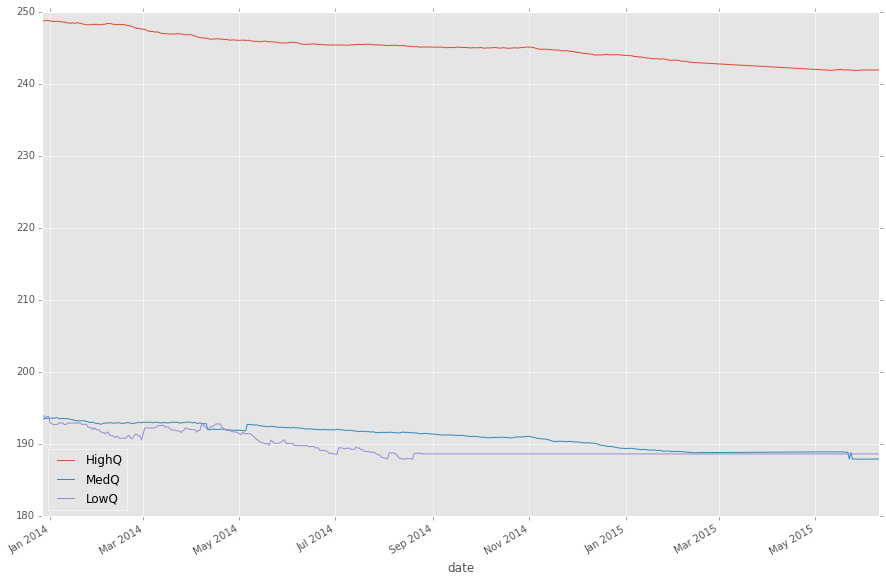

In [67]:
# Lets plot all the prices
df_cal[["HighQ", "MedQ", "LowQ"]].plot()

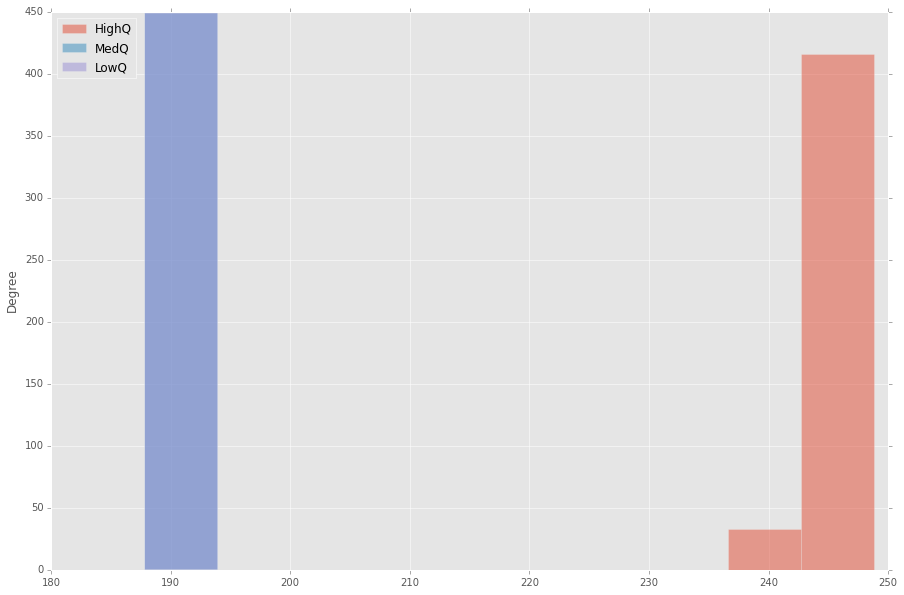

In [70]:
df_cal[["HighQ", "MedQ", "LowQ"]].plot(kind = "hist", alpha = 0.5)

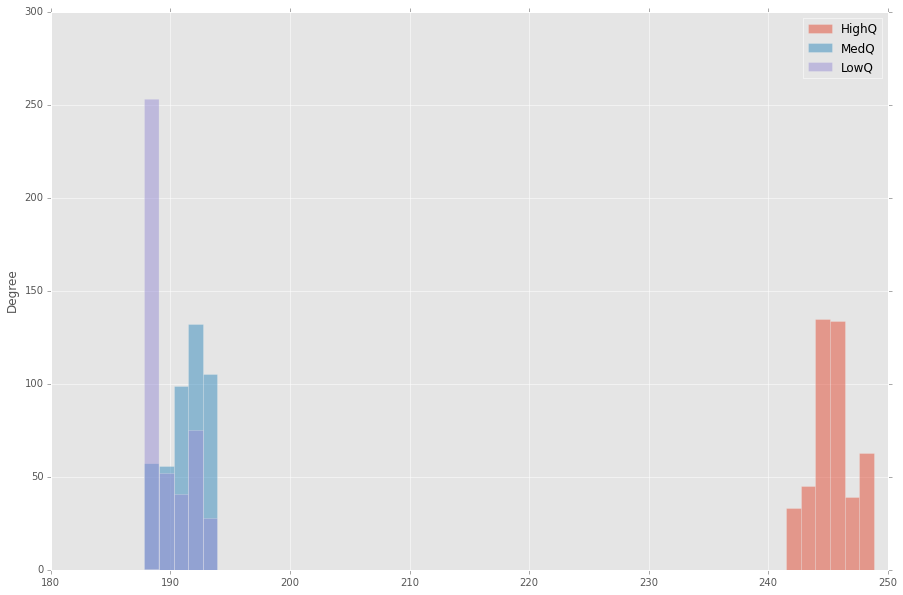

In [72]:
# Lets increase the number of bins
df_cal[["HighQ", "MedQ", "LowQ"]].plot(kind = "hist", bins = 50, alpha = 0.5)

In [44]:
# Filter data for location California, 2014, set index as date
df['year'] = pd.DatetimeIndex(df['date']).year
df_cal_2014 = df[(df["year"] == 2014) & (df["State"] == "California")]
df_cal_2014.index = df_cal_2014.date
df_cal_2014.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,year
date,,,,,,,,,
2014-01-01,California,248.78,12096,193.56,12812,192.92,778,2014-01-01,2014
2014-01-02,California,248.67,12125,193.56,12836,192.80,779,2014-01-02,2014
2014-01-03,California,248.67,12141,193.57,12853,192.67,782,2014-01-03,2014
2014-01-04,California,248.65,12155,193.59,12884,192.67,782,2014-01-04,2014
2014-01-05,California,248.68,12176,193.63,12902,192.67,782,2014-01-05,2014


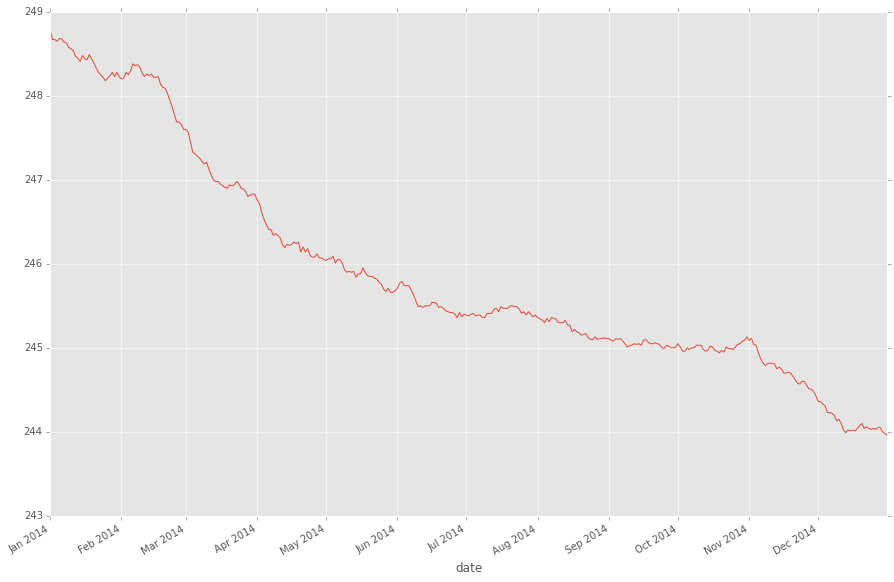

In [45]:
# Lets plot the HighQ Values
df_cal_2014.HighQ.plot()

## 3.2 Single Variable - Categorical

In [6]:
df_demo.head()

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,37659181,40,6,13,38,29527,1119,35.4


In [7]:
# Create an index in the demographic data to ease the labels 
df_demo.index = df_demo.region
df_demo.head()

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
region,,,,,,,,,
alabama,alabama,4799277,67,26,1,4,23680,501,38.1
alaska,alaska,720316,63,3,5,6,32651,978,33.6
arizona,arizona,6479703,57,4,3,30,25358,747,36.3
arkansas,arkansas,2933369,74,15,1,7,22170,480,37.5
california,california,37659181,40,6,13,38,29527,1119,35.4


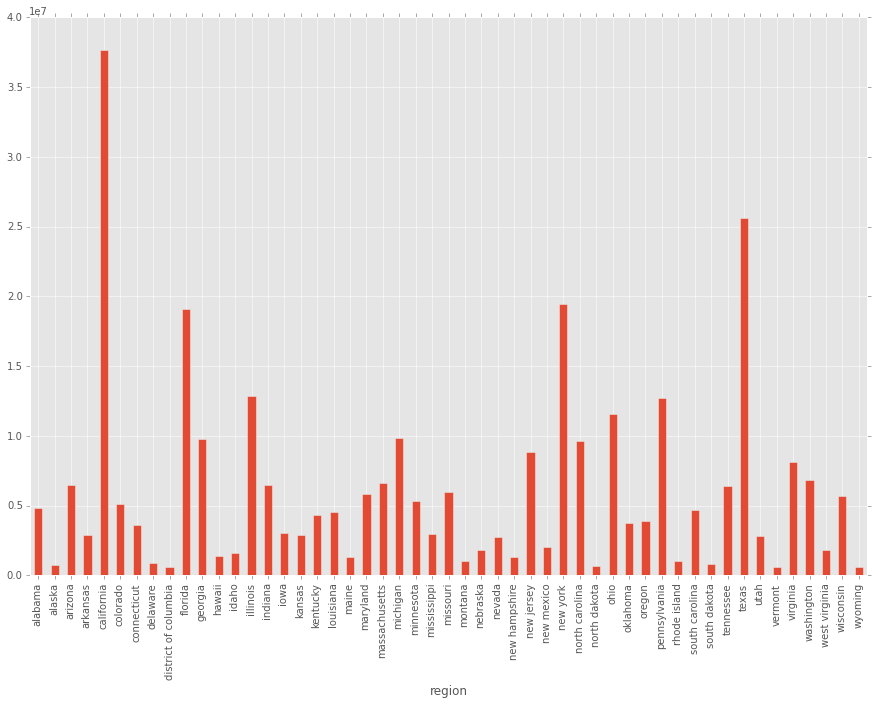

In [8]:
# Lets plot this in a simple bar chart
df_demo.total_population.plot(kind ="bar")

In [9]:
# Lets sort the columns to make them in ascending order
# CHANGE TO INPLACE = TRUE
df_demo_sort = df_demo.sort(columns='total_population',ascending=True)
df_demo_sort.head()

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
region,,,,,,,,,
wyoming,wyoming,570134,85,1,1,9,28902,647,36.8
district of columbia,district of columbia,619371,35,49,3,10,45290,1154,33.8
vermont,vermont,625904,94,1,1,2,29167,754,42.0
north dakota,north dakota,689781,88,1,1,2,29732,564,36.4
alaska,alaska,720316,63,3,5,6,32651,978,33.6


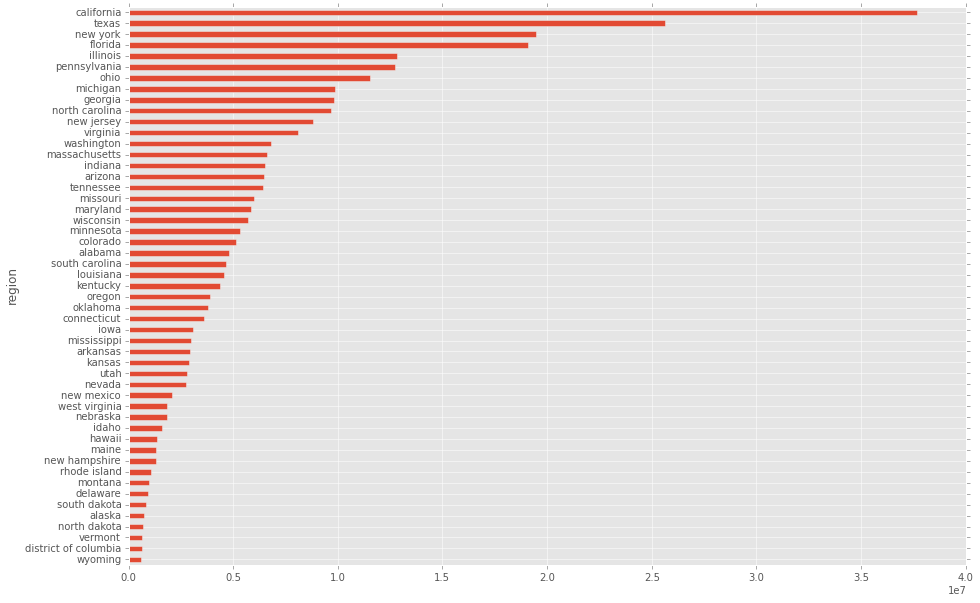

In [10]:
# Lets now plot again 
df_demo_sort.total_population.plot(kind = "barh")

In [11]:
# Lets select the percent population
df_demo_sort.iloc[:,2:6].head()

,percent_white,percent_black,percent_asian,percent_hispanic
region,,,,
wyoming,85,1,1,9
district of columbia,35,49,3,10
vermont,94,1,1,2
north dakota,88,1,1,2
alaska,63,3,5,6


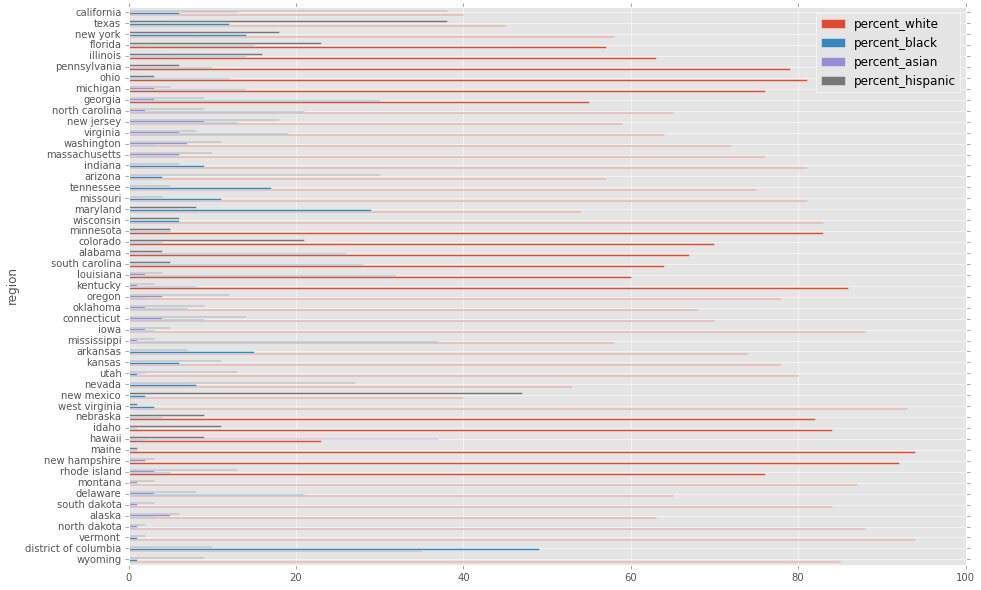

In [12]:
# Lets plot the percentage population
df_demo_sort.iloc[:,2:6].plot(kind = "barh")

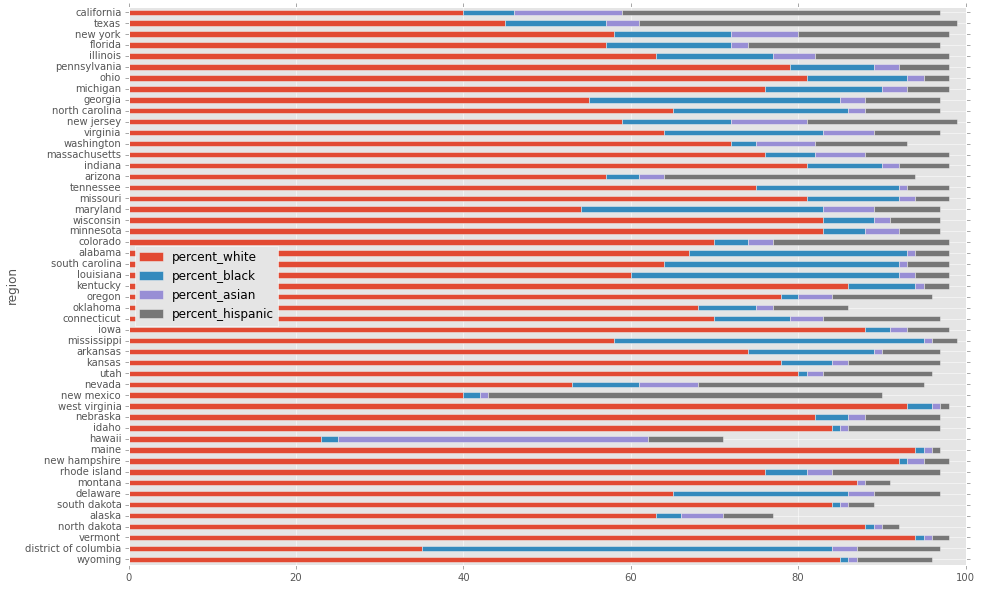

In [13]:
# Lets stack the percentage population
df_demo_sort.iloc[:,2:6].plot(kind = "barh", stacked = True)

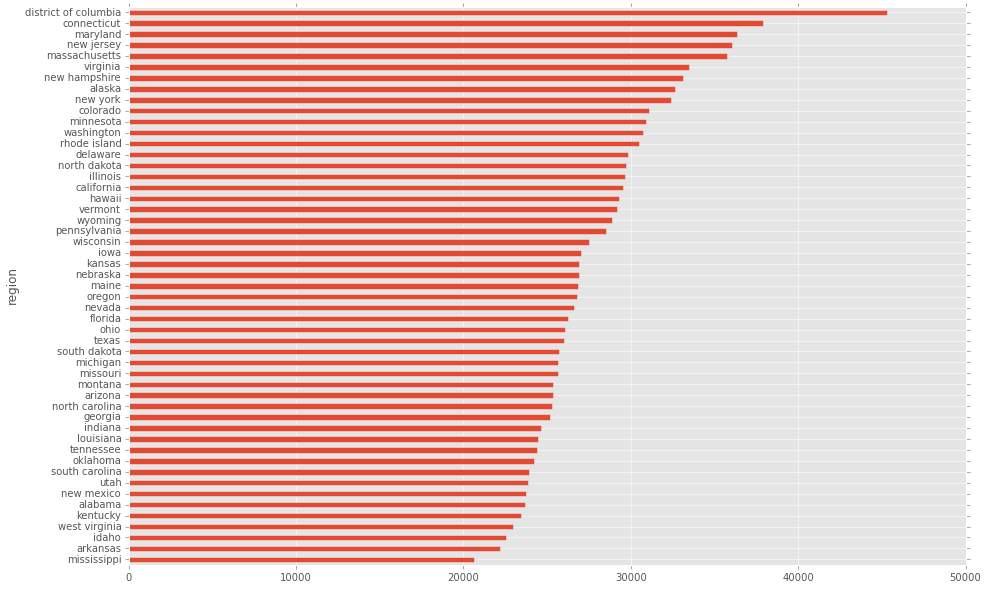

In [14]:
# Lets plot the Per Capita Income 
df_demo.sort(columns='per_capita_income', ascending=True).per_capita_income.plot(kind = "barh")

Lets plot in the Geographic Coordinates (without using maps)

In [15]:
# Lets get the latitude and longitude for each of the state
df_geo = pd.read_csv("data/State_Location.csv")
df_geo.head()

,region,state,latitude,longitude
0,alaska,AK,61.3850,-152.2683
1,alabama,AL,32.7990,-86.8073
2,arkansas,AR,34.9513,-92.3809
3,arizona,AZ,33.7712,-111.3877
4,california,CA,36.1700,-119.7462


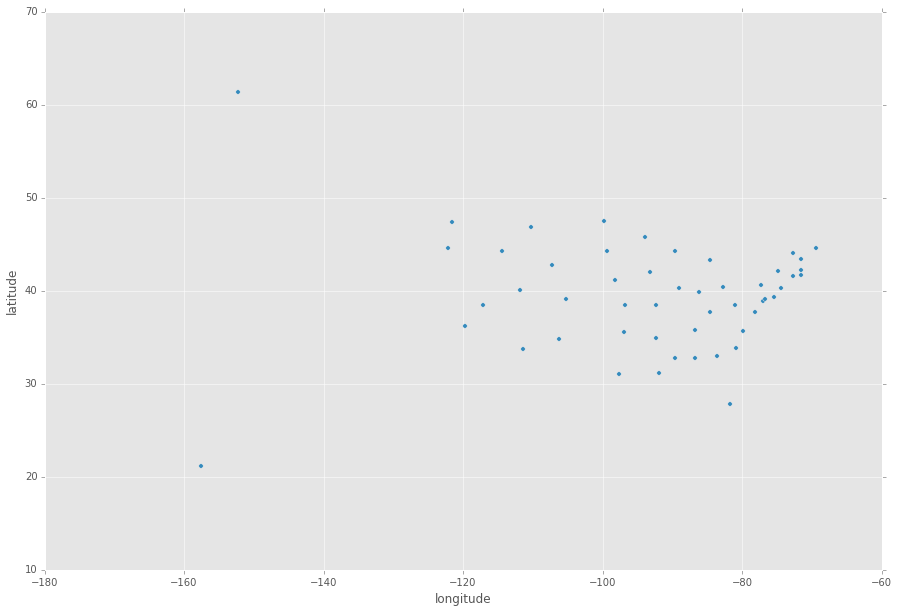

In [16]:
# Lets draw the states as a point
df_geo.plot(kind = "scatter", x = "longitude", y = "latitude")

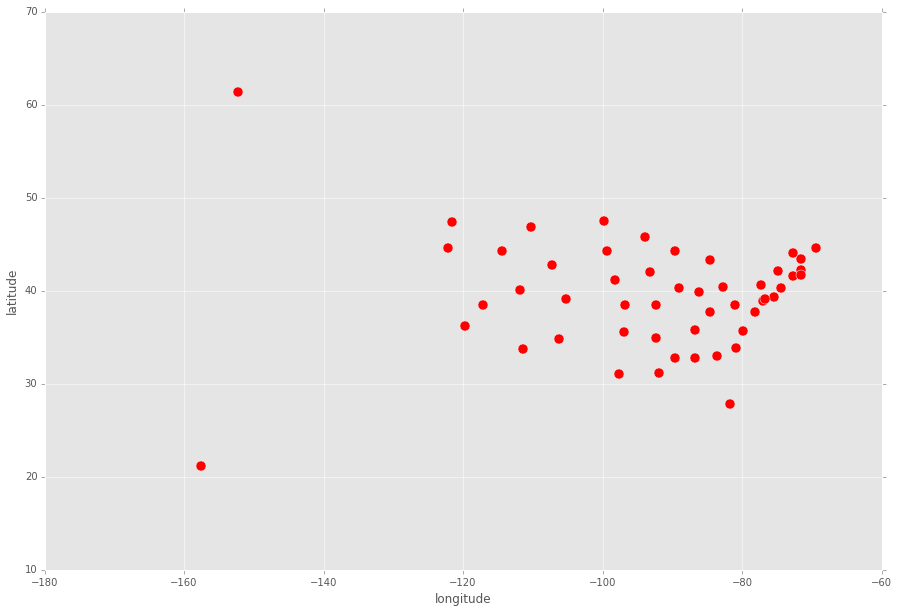

In [17]:
# Lets change the color of the dot and increase the size
df_geo.plot(kind = "scatter", x = "longitude", y = "latitude", c = "red", s = 100)

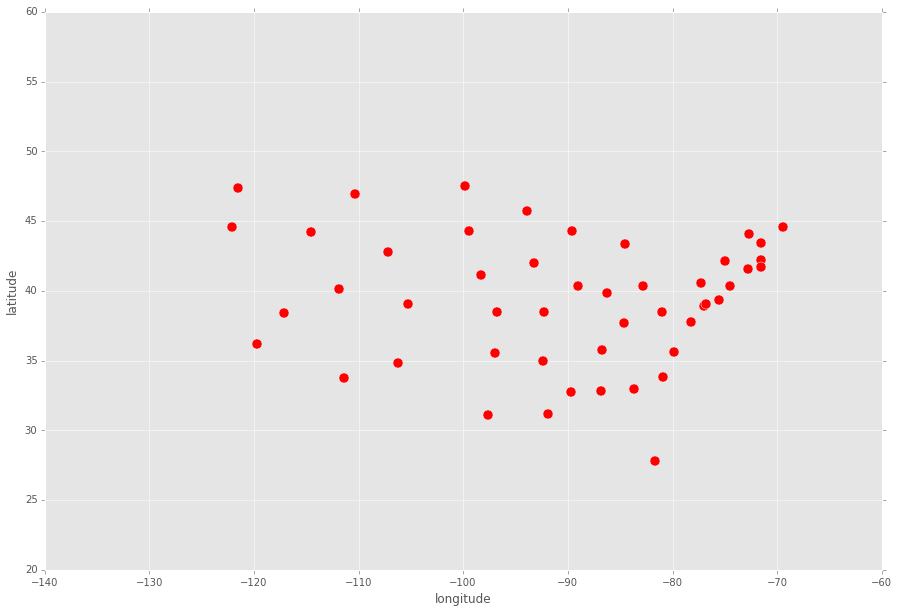

In [18]:
# Lets zoom in to the mainland USA

df_geo.plot(kind = "scatter", x = "longitude", y = "latitude", c = "red", s = 100,
            xlim = (-140,-60), ylim = (20,60))

In [19]:
# Lets plot some data on this plot
df_demo_geo = pd.merge(df_demo, df_geo, on = "region")
df_demo_geo.index = df_demo_geo.region
df_demo_geo.head()

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age,state,latitude,longitude
region,,,,,,,,,,,,
alabama,alabama,4799277,67,26,1,4,23680,501,38.1,AL,32.7990,-86.8073
alaska,alaska,720316,63,3,5,6,32651,978,33.6,AK,61.3850,-152.2683
arizona,arizona,6479703,57,4,3,30,25358,747,36.3,AZ,33.7712,-111.3877
arkansas,arkansas,2933369,74,15,1,7,22170,480,37.5,AR,34.9513,-92.3809
california,california,37659181,40,6,13,38,29527,1119,35.4,CA,36.1700,-119.7462


In [20]:
df_demo_geo.index = df_demo_geo.region
df_demo_geo.iloc[:,10:12].head()

,latitude,longitude
region,,
alabama,32.7990,-86.8073
alaska,61.3850,-152.2683
arizona,33.7712,-111.3877
arkansas,34.9513,-92.3809
california,36.1700,-119.7462


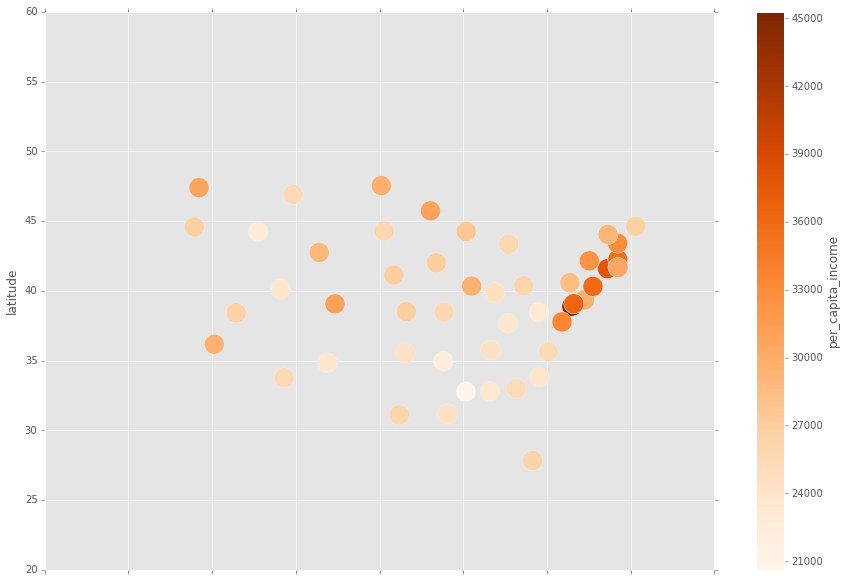

In [23]:
# Lets draw a scatter plot
df_demo_geo.plot(kind = "scatter", x = "longitude", y = "latitude", c = "per_capita_income", s = 400,
                 xlim = (-140,-60), ylim = (20,60), colormap = "Oranges")

# 3.3 Dual Variable

Notes
- Choropleth
- Pie vs Bar
- Facetting